In [1]:
from scipy.io import loadmat
import numpy as np
from PIL import Image
import glob
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import pylab

## Prepare data

### Gather Structure

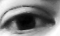

In [35]:
file = '../../MPIIGaze/Data/Normalized/p00/day01.mat'
matfile = loadmat(file)
img = matfile['data']['right'][0, 0]['image'][0, 0][0]
Image.fromarray(img)

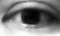

In [36]:
img = matfile['data']['left'][0, 0]['image'][0, 0][0]
Image.fromarray(img)

In [37]:
img = matfile['data']['left'][0, 0]['image']
print(matfile['data'].dtype)
print(matfile['data']['left'][0, 0].dtype)
print(matfile['data']['left'][0, 0]['image'][0, 0].dtype)

[('right', 'O'), ('left', 'O')]
[('gaze', 'O'), ('image', 'O'), ('pose', 'O')]
uint8


In [39]:
matfile['data']['left'][0, 0]['pose'][0, 0] - matfile['data']['right'][0, 0]['pose'][0, 0]

array([[-5.66080908e-04, -1.22588360e-01, -9.37510393e-03],
       [-3.15627853e-04, -1.22244410e-01, -1.08044690e-02],
       [-4.36368802e-04, -1.22706508e-01, -1.15059283e-02],
       ...,
       [-1.10181295e-04, -1.43056185e-01, -1.27823902e-03],
       [ 5.51346457e-06, -1.42746758e-01,  6.37381501e-05],
       [ 1.87735068e-05, -1.42137507e-01,  2.43532358e-04]])

In [3]:
gaze = pd.DataFrame(matfile['data']['left'][0, 0]['gaze'][0,0])

In [4]:
pose = pd.DataFrame(matfile['data']['left'][0, 0]['pose'][0,0])
pp.ProfileReport(pose * np.pi * 2)

Number of variables,3
Number of observations,995
Total Missing (%),0.0%
Total size in memory,23.4 KiB
Average record size in memory,24.1 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [21]:
file = '../../MPIIGaze/Data/6 points-based face model.mat'
matfile = loadmat(file)
dataset_model = matfile['model']
tutorial_model =  np.array([ (0.0, 0.0, 0.0),            # Nose tip
                            (0.0, -330.0, -65.0),        # Chin
                            (-225.0, 170.0, -135.0),     # Left eye left corner
                            (225.0, 170.0, -135.0),      # Right eye right corne
                            (-150.0, -150.0, -125.0),    # Left Mouth corner
                            (150.0, -150.0, -125.0)      # Right mouth corner
                        ]).T/9
dataset_model.shape, tutorial_model.shape

((3, 6), (3, 6))

In [33]:
dataset_model

array([[-4.50967681e+01, -2.13128582e+01,  2.13128582e+01,
         4.50967681e+01, -2.62995769e+01,  2.62995769e+01],
       [-4.83773045e-01,  4.83773045e-01,  4.83773045e-01,
        -4.83773045e-01,  6.85950353e+01,  6.85950353e+01],
       [ 2.39702984e+00, -2.39702984e+00, -2.39702984e+00,
         2.39702984e+00, -9.86076132e-32, -9.86076132e-32]])

In [34]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import numpy as np

trace1 = go.Scatter3d(
#     x=dataset_model[0] * 0.6,
#     y=-(dataset_model[1] * 0.5 - 20),
#     z=-(dataset_model[2] + 10),
    x=dataset_model[0],
    y=(dataset_model[1]),
    z=(dataset_model[2]),
    text = ['0 - Left eye left corner', '1 - Left eye right corner', '2 - Right eye left corner', 
            '3 - Right eye right corner', '4 - Left Mouth corner', '5 - Right mouth corner'],
    mode='markers',
    marker=dict(size=12,line=dict(color='rgba(217, 217, 217, 0.14)', width=0.5), opacity=0.8),
    name = 'Dataset model'
)

trace2 = go.Scatter3d(
    x=tutorial_model[0],
    y=tutorial_model[1],
    z=tutorial_model[2],
    text = ['0 - Nose tip', '1 - Chin', '2 - Left eye left corner', 
            '3 - Right eye right corner', '4 - Left Mouth corner', '5 - Right mouth corner'],
    mode='markers',
    marker=dict(size=12,line=dict(color='rgba(217, 217, 217, 0.14)', width=0.5), opacity=0.8), 
    name = 'Tutorial model'
)

data = [trace1, trace2]
layout = go.Layout(margin=dict(l=0,r=0,b=0,t=0))
fig = go.Figure(data=data, layout=layout)
py.plot(fig, filename='Face model comparison')

C:\Users\Valik\Anaconda3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `Face model comparison` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Valik\\Documents\\GitHub\\dataroot\\RETNNA\\GazeEstimator\\dataset gathering\\Face model comparison.html'

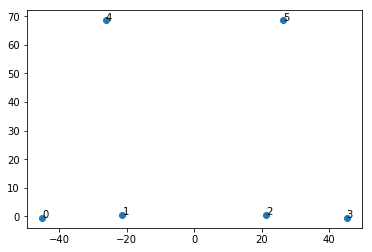

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = dataset_model[0], y = dataset_model[1])
for i in range(6):
    ax.annotate(str(i), (dataset_model[0][i], dataset_model[1][i]))
pylab.savefig('dataset_model.png')

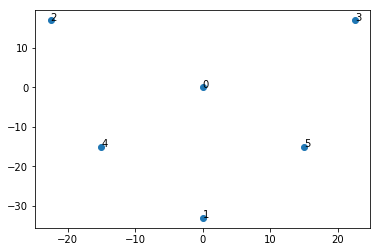

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = tutorial_model[0], y = tutorial_model[1])
for i in range(6):
    ax.annotate(str(i), (tutorial_model[0][i], tutorial_model[1][i]))
pylab.savefig('tutorial_model.png')

In [71]:
len(mat_files)

521

In [100]:
image_size = matfile['data']['left'][0, 0]['image'][0, 0][0].shape
image_size

(36, 60)

In [74]:
data = [loadmat(file)['data'] for file in mat_files]

In [127]:
def extract_images(data, direction = 'right'):
    result = []
    for sample in data:
        if len(result) == 0:
            result = sample[direction][0,0]['image'][0, 0]
        result = np.append(result, sample[direction][0,0]['image'][0, 0])
    return result

In [128]:
extract_images(data[0:20]).shape

array([198, 210, 222, ..., 255, 255, 255], dtype=uint8)

In [116]:
data[]

(521,)

In [117]:
(0, *image_size)

(0, 36, 60)